In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *
from sklearn.decomposition import PCA
import altair as alt, seaborn as sns
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
!ls *.npy

exp1_rastrigin.npy  exp2_rastrigin.npy  exp3_rastrigin.npy  exp4_rastrigin.npy
exp1_rosenbrock.npy exp2_rosenbrock.npy exp3_rosenbrock.npy exp4_rosenbrock.npy
exp1_sphere.npy     exp2_sphere.npy     exp3_sphere.npy     exp4_sphere.npy


In [3]:
functions = ['sphere','rastrigin','rosenbrock']

# Functions

In [10]:
def plot_function(func):
    exps = sorted([o.stem for o in Path().glob(f'*{func}*.npy')]) # retrieving file names
    source_data = []
    for exp in exps: source_data.append(pd.DataFrame(np.load(exp+'.npy')).assign(name=exp)) # reading files
    df_source = pd.concat(source_data) # putting all files together in a pandas dataframe
    d = df_source.iloc[:,:30] # grabs the values (30 dim)
    pca = PCA(1) # initialize PCA
    d_pca = pca.fit_transform(d) # reduces dimentions to 1
    dd = df_source.name.to_frame() # grabs from df_source only the names of experiments
    dd['value'] = d_pca[:,0] # adds the reduced dimentions to dd
    plot_data = dd.copy() # putting the data in format to plot
    plot_data['time'] = np.repeat(np.arange(100)[None], len(exps), 0).reshape(-1) # add time values 

    fig,axs = plt.subplots(len(exps), 1, figsize=(8,1.5*len(exps))) # plot figures
    for exp,ax in zip(exps,axs):
        texp,tfunc = exp.split('_')
        t = plot_data.query(f"name=={exp!r}")
        ax.plot(t['time'], t['value'] ,'*-', label=exp)
        ax.set_title(f'{texp}-{tfunc.title()}')
        ax.set_xlim(0,100)
    plt.tight_layout()
    return fig,axs

In [11]:
def plot_function_with_best(func):
    exps = sorted([o.stem for o in Path().glob(f'*{func}*.npy')]) # retrieving file names
    source_data = []
    for exp in exps: source_data.append(pd.DataFrame(np.load(exp+'.npy')).assign(name=exp)) # reading files
    df_source = pd.concat(source_data) # putting all files together in a pandas dataframe
    d = df_source.iloc[:,:30] # grabs the values (30 dim)
    pca = PCA(1) # initialize PCA
    d_pca = pca.fit_transform(d) # reduces dimentions to 1
    dd = df_source.name.to_frame() # grabs from df_source only the names of experiments
    dd['value'] = d_pca[:,0] # adds the reduced dimentions to dd
    plot_data = dd.copy() # putting the data in format to plot
    plot_data['time'] = np.repeat(np.arange(100)[None], len(exps), 0).reshape(-1) # add time values 

    fig,axs = plt.subplots(len(exps), 2, figsize=(14,1.5*len(exps))) # plot figures
    for exp,ax,best_ax in zip(exps,axs[:,0],axs[:,1]): 
        t = plot_data.query(f"name=={exp!r}")
        ax.plot(t['time'], t['value'] ,'o-', label=exp)
        ax.set_title(exp)
        best_file = Path(f"../../data/results/{exp.split('_')[0]}/{func}/best_known.csv")
        best_values = np.asarray(pd.read_csv(best_file).fitness)
        best_ax.plot(best_values,'o-', label=exp)
        best_ax.set_title(f'best {exp}')
    plt.tight_layout()
    return pca

In [45]:
def plot_function_new(func):#i added this new pca plot for ppsn paper, to present pcaplot with another format
    exps = sorted([o.stem for o in Path().glob(f'*{func}*.npy')]) # retrieving file names
    source_data = []
    for exp in exps: source_data.append(pd.DataFrame(np.load(exp+'.npy')).assign(name=exp)) # reading files
    df_source = pd.concat(source_data) # putting all files together in a pandas dataframe
    d = df_source.iloc[:,:30] # grabs the values (30 dim)
    pca = PCA(1) # initialize PCA
    d_pca = pca.fit_transform(d) # reduces dimentions to 1
    dd = df_source.name.to_frame() # grabs from df_source only the names of experiments
    dd['value'] = d_pca[:,0] # adds the reduced dimentions to dd
    plot_data = dd.copy() # putting the data in format to plot
    plot_data['time'] = np.repeat(np.arange(100)[None], len(exps), 0).reshape(-1) # add time values 

    fig,axs = plt.subplots(1, 4, figsize=(16,0.8*len(exps))) # plot figures
    for exp,ax in zip(exps,axs):
        texp,tfunc = exp.split('_')
        t = plot_data.query(f"name=={exp!r}")
        ax.plot(t['time'], t['value'] ,'-*', label=exp, c='crimson')
        ax.set_title(f'{texp}-{tfunc.title()}')
        ax.set_xlim(0,100)
    plt.tight_layout()
    return fig,axs

# Plots

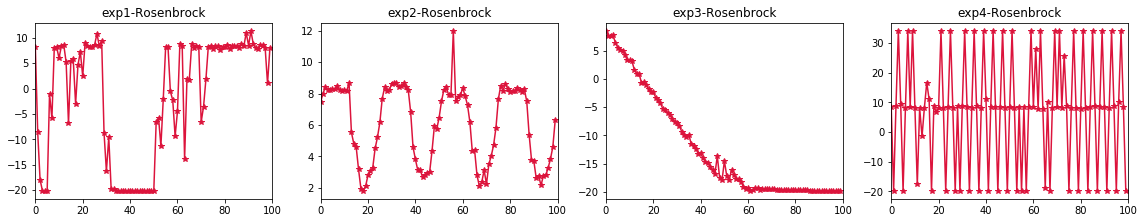

In [46]:
fig,axs = plot_function_new('rosenbrock')
fig.savefig(f'../../data/cluster_results/pcaPlot.eps', dpi=400, format='eps')
# plot_function('rosenbrock')
# plot_function('rastrigin')
#save(str(path/'pcaPlot.png'), scale_factor=2)

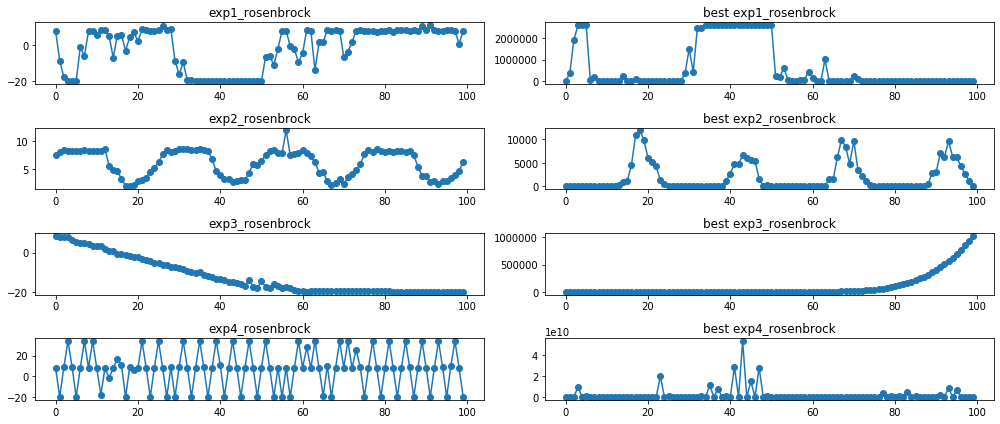

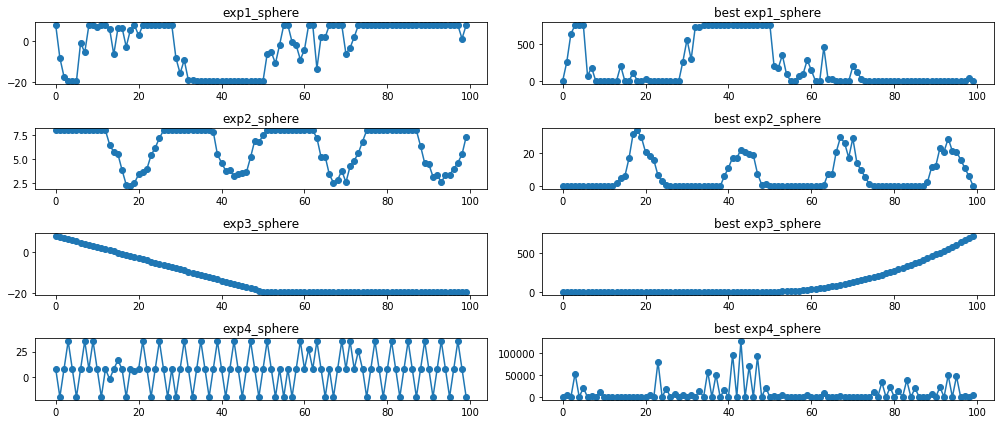

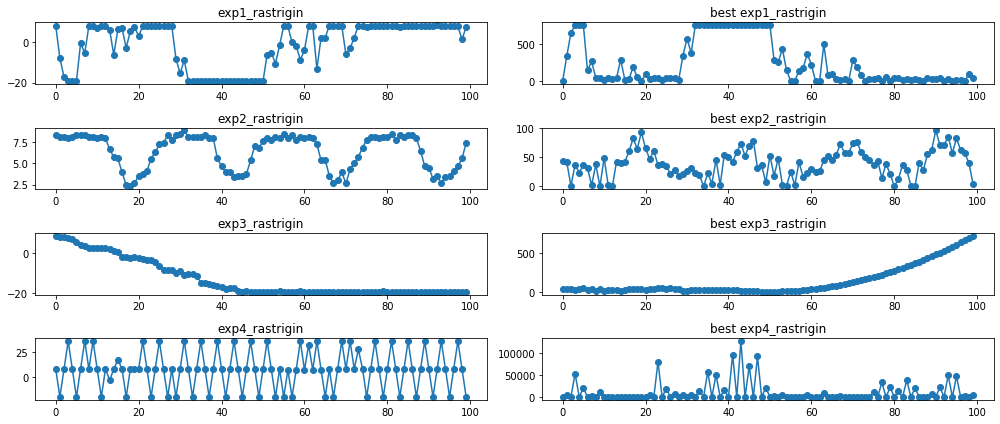

In [7]:
pcas = [plot_function_with_best('rosenbrock'),
        plot_function_with_best('sphere'),
        plot_function_with_best('rastrigin')]

In [57]:
pca.explained_variance_ratio_

array([0.94667554])

In [61]:
[o.explained_variance_ratio_ for o in pcas]


[array([0.94667554]), array([0.99997404]), array([0.98585868])]

# Check the values

In [64]:
func = 'sphere'
exp = 'exp3'
sampledf=pd.DataFrame(np.load(f'{exp}_{func}.npy'))
with pd.option_context('display.max_columns', 30):
    display(sampledf.iloc[:6].round(2))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1
2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2
3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3
4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4
5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5


In [65]:
def euc_dist(df, i, j):
    return np.sqrt(np.power(np.array(df.iloc[i])-np.array(df.iloc[j]),2).sum())

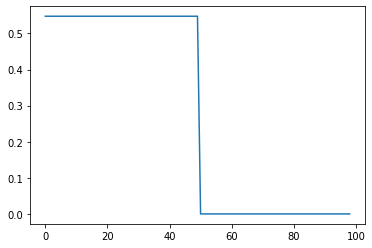

In [66]:
plt.plot([euc_dist(sampledf, i, i+1) for i in range(99)])

In [43]:
euc_dist(sampledf, 0, 1)

27.386127875258307

In [44]:
euc_dist(sampledf, 1, 2)

27.386127875258293

In [21]:
np.array(sampledf.iloc[0])[0]

-1.1441535908112746e-147

In [80]:
func = 'rastrigin'
exp = 'exp1' 
with pd.option_context('display.max_columns', 30):
    display(pd.DataFrame(np.load(f'{exp}_{func}.npy')).iloc[:4].round(2))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-0.00,0.00,-0.00,-0.00,0.99,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
1,-2.97,-2.06,-1.86,-3.01,-3.00,-2.09,-4.01,-3.95,-2.12,-4.94,-2.96,-3.97,-2.05,-3.00,-0.98,-2.97,-3.01,-2.95,-2.01,-3.92,-0.96,-4.03,-5.00,-2.05,-2.04,-2.98,-1.96,-2.99,-5.00,-2.97
2,-4.97,-4.97,-4.97,-4.97,-5.00,-3.98,-3.98,-3.98,-3.98,-4.97,-3.98,-4.97,-4.97,-4.97,-4.97,-3.98,-3.98,-3.98,-3.98,-4.97,-4.97,-4.97,-4.97,-5.00,-4.97,-4.97,-3.98,-4.97,-3.98,-4.97
3,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00,-5.00


# -----